# **SPEECH COMMANDS RECOGNITION**

### ***DATA***: 105.829 recordings of 35 words. Each recording is an array of 20 frequencies times 80 time periods (Spectrogram) reshaped as a a vector of 1600 components.
### ***GOAL***: Build a MLP to classify each recording to the correct class among the 35 words.

In [27]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import SC_functions as scf
import pvml
import seaborn as sns


#### 1.1 Visualize the data

In [28]:
#DATA LOADING

classes = np.loadtxt('../data_gitignore/classes.txt', dtype=str)

test_names = np.loadtxt('../data_gitignore/test-names.txt', dtype=str)
test_data = np.load('../data_gitignore/test.npz')
test_Y = test_data['arr_1']
test_X = test_data['arr_0']

train_names = np.loadtxt('../data_gitignore/train-names.txt', dtype=str)
train_data = np.load('../data_gitignore/train.npz')
train_Y = train_data['arr_1']
train_X = train_data['arr_0']

validation_names = np.loadtxt('../data_gitignore/validation-names.txt', dtype=str)
validation_data = np.load('../data_gitignore/validation.npz')
validation_Y = validation_data['arr_1']
validation_X = validation_data['arr_0']

#SHAPE EXPLORATION

print('test_X shape: ', test_X.shape)
print('train_X shape: ', train_X.shape)
print('validation_X shape: ', validation_X.shape)

test_X shape:  (9376, 1600)
train_X shape:  (84291, 1600)
validation_X shape:  (12162, 1600)


row index of backward =  8
row index of house =  18
row index of go =  22


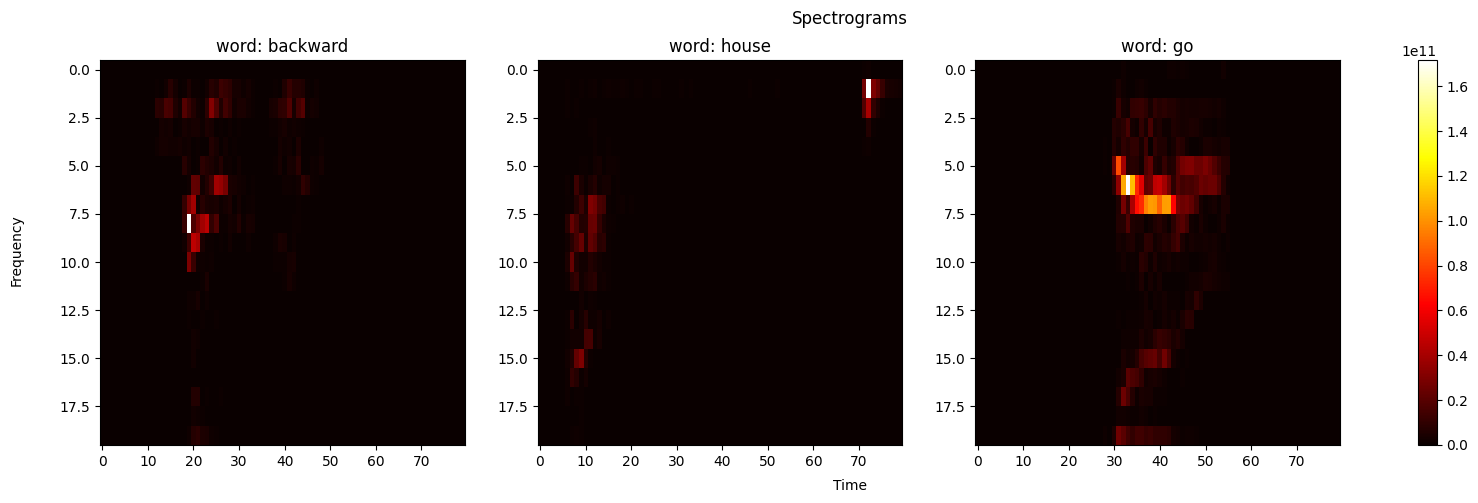

Text(0.5, 1.0, 'Occurrences for each word')

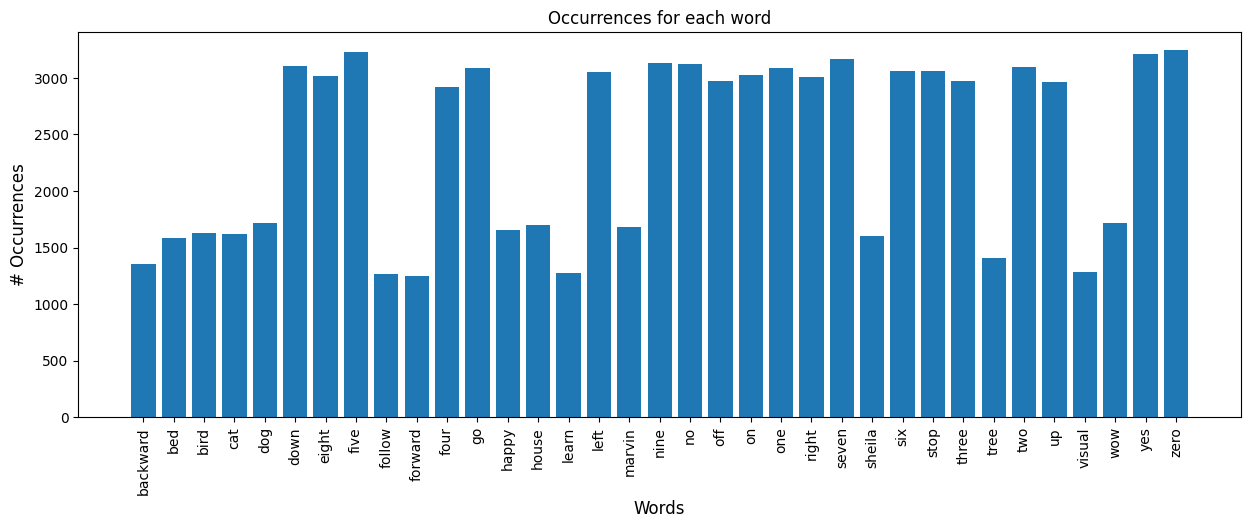

In [29]:
#DATA EXPLORATION

#spectrograms
scf.show_spectrogram_multiple(train_X, train_Y, classes, ['backward', 'house', 'go'])

#occurrences for each word
words = [w for w in classes]
counters = np.bincount(train_Y)
plt.figure(figsize = (15, 5))
plt.bar(words, counters)
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 12)
plt.ylabel('# Occurrences', fontsize=12)
plt.title('Occurrences for each word')

### 1.2 Feature Normalization

In [30]:
#MEAN-VAR NORMALIZATION
#when std is small we can have numerical issues
train_X_norm_MV, test_X_norm_MV = scf.mean_var_normalize(train_X, test_X)

#MIN-MAX NORMALIZATION
train_X_norm_MM, test_X_norm_MM = scf.min_max_normalize(train_X, test_X)

#MAX-ABS NORMALIZATION
train_X_norm_MA, test_X_norm_MA = scf.max_abs_normalize(train_X, test_X)

#WHITENING NORMALIZATION
train_X_norm_WN, test_X_norm_WN = scf.whitening_normalize(train_X, test_X)


### 1.3 Train a Neural Network

|   Type        |   Epochs  | 
|    ----       |   :----:  |
|  Batch 84291  |   100     |
|  Batch 1      |   100     |
|  Batch 50     |   100     |
|  Batch 100    |   100     |
|  Batch 200    |   100     |
|  Batch 500    |   100     |

In [31]:
#define a template for training and testing using different batch sizes

#DECOMMENT TO USE

'''

batches = [1, 10, 30, 50, 100, 200, 500, 84291]
scf.compare_batches(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, batches)

'''



'\n\nbatches = [1, 10, 30, 50, 100, 200, 500, 84291]\nscf.compare_batches(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, batches)\n\n'

/tmp/ipykernel_2569/2229678110.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_accs = pd.read_csv('../results/accuracies.txt', sep=r' |\t')


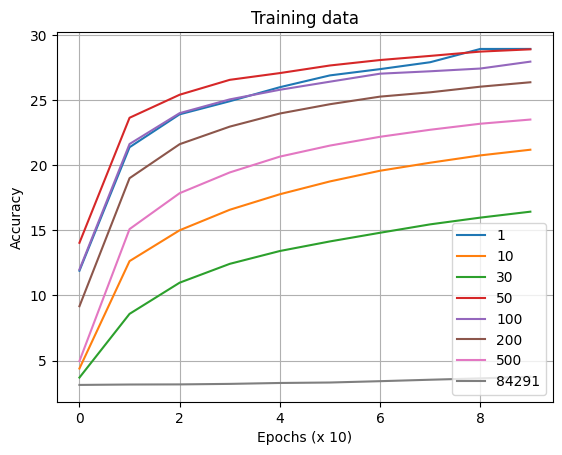

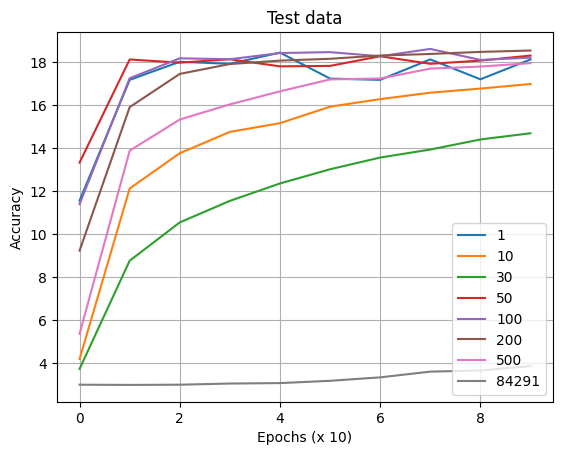

In [32]:
#read file and plot

df_accs = pd.read_csv('../results/accuracies.txt', sep=r' |\t')
df_accs['sorting'] = scf.sorting_list(10,8)
df_accs_train = df_accs.pivot(index = 'batch_size', values = 'train_accuracy', columns = 'sorting')
df_accs_test = df_accs.pivot(index = 'batch_size', values = 'test_accuracy', columns = 'sorting')
df_accs_train.T.plot(title='Training data', xlabel='Epochs (x 10)', ylabel='Accuracy', grid = True)
plt.legend(title='')
df_accs_test.T.plot(title='Test data', xlabel='Epochs (x 10)', ylabel='Accuracy', grid = True)
plt.legend(title='')

### 1.4 Network Architecture

|   Hidden<br>Layers   |   Epochs  |            Structure                       |
|       :----:         |   :----:  |      ----                                  |
|         0            |    100    |     1600 + 35                              |
|         1            |    100    |     1600 + 300 + 35                        |
|         2            |    100    |     1600 + 128 + 128 + 128 + 128 + 35      |
|         3            |    100    |     1600 + 200 + 128 + 56 + 35             |


In [33]:
#define a template for training and testing using different architectures with the chosen batch size

#DECOMMENT TO USE
'''

net = pvml.MLP([1600, 35])
scf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 0, [], net, moment = 0.9)

net = pvml.MLP([1600, 128, 128, 128, 128, 35])
scf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 4, [128, 128, 128, 128], net, moment = 0.9)

net = pvml.MLP([1600, 300, 35])
scf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 1, [300], net, moment = 0.9)

net = pvml.MLP([1600, 200, 128, 56, 35])
scf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 3, [200, 128, 56], net, moment = 0.9)

'''



'\n\nnet = pvml.MLP([1600, 35])\nscf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 0, [], net, moment = 0.9)\n\nnet = pvml.MLP([1600, 128, 128, 128, 128, 35])\nscf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 4, [128, 128, 128, 128], net, moment = 0.9)\n\nnet = pvml.MLP([1600, 300, 35])\nscf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 1, [300], net, moment = 0.9)\n\nnet = pvml.MLP([1600, 200, 128, 56, 35])\nscf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 3, [200, 128, 56], net, moment = 0.9)\n\n'

/tmp/ipykernel_2569/2097919548.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_accs = pd.read_csv('../results/accuracies_14.txt', sep=r' |\t')


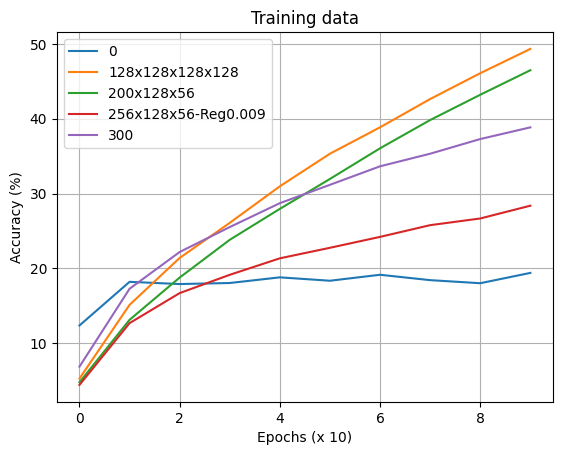

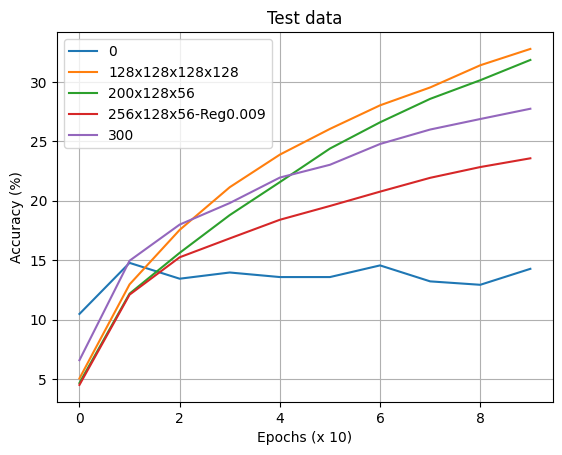

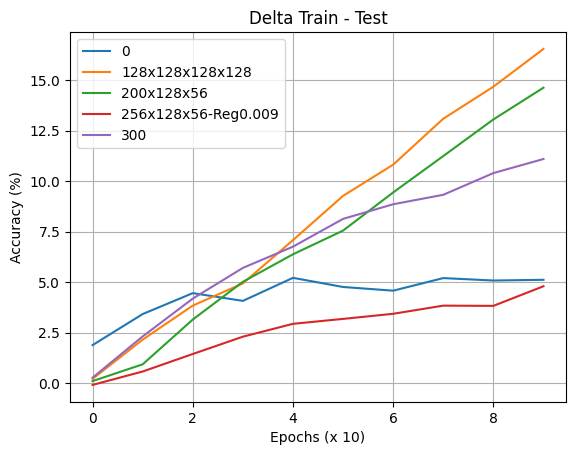

In [34]:
#read file and plot

df_accs = pd.read_csv('../results/accuracies_14.txt', sep=r' |\t')
df_accs['sorting'] = scf.sorting_list(10,5)
df_accs['deltas'] = df_accs['train_accuracy'] - df_accs['test_accuracy']
df_accs_train = df_accs.pivot(index = 'hidden_width', values = 'train_accuracy', columns = 'sorting')
df_accs_test = df_accs.pivot(index = 'hidden_width', values = 'test_accuracy', columns = 'sorting')
df_accs_deltas = df_accs.pivot(index = 'hidden_width', values = 'deltas', columns = 'sorting')
df_accs_train.T.plot(title='Training data', xlabel='Epochs (x 10)', ylabel='Accuracy (%)', grid = True)
plt.legend(title='')
df_accs_test.T.plot(title='Test data', xlabel='Epochs (x 10)', ylabel='Accuracy (%)', grid = True)
plt.legend(title='')
df_accs_deltas.T.plot(title='Delta Train - Test', xlabel='Epochs (x 10)', ylabel='Accuracy (%)', grid = True)
plt.legend(title='')

In [35]:
#TRAINING 400 EPOCHS
#DECOMMENT TO USE

'''

net = pvml.MLP([1600, 256, 128, 56, 35])
scf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 3, [256, 128, 56], net, moment = 0.9, n_epochs = 400, store = True)

net = pvml.MLP([1600, 128, 128, 128, 128, 35])
scf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 4, [128, 128, 128, 128], net, moment = 0.9, n_epochs = 400, store = True)

net = pvml.MLP([1600, 512, 256, 128, 35])
scf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 3, [256, 128, 56], net, moment = 0.9, n_epochs = 400, store = True)


'''


'\n\nnet = pvml.MLP([1600, 256, 128, 56, 35])\nscf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 3, [256, 128, 56], net, moment = 0.9, n_epochs = 400, store = True)\n\nnet = pvml.MLP([1600, 128, 128, 128, 128, 35])\nscf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 4, [128, 128, 128, 128], net, moment = 0.9, n_epochs = 400, store = True)\n\nnet = pvml.MLP([1600, 512, 256, 128, 35])\nscf.compare_arch(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 50, 3, [256, 128, 56], net, moment = 0.9, n_epochs = 400, store = True)\n\n\n'

/tmp/ipykernel_2569/3671497593.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_accs = pd.read_csv('../results/accuracies_trained.txt', sep=r' |\t')


Text(0.04, 0.5, 'Accuracy (%)')

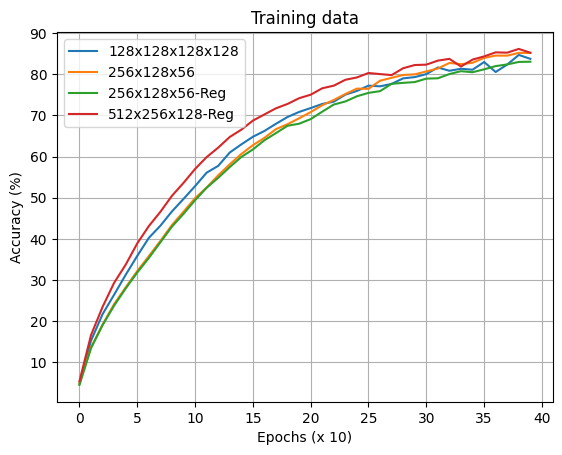

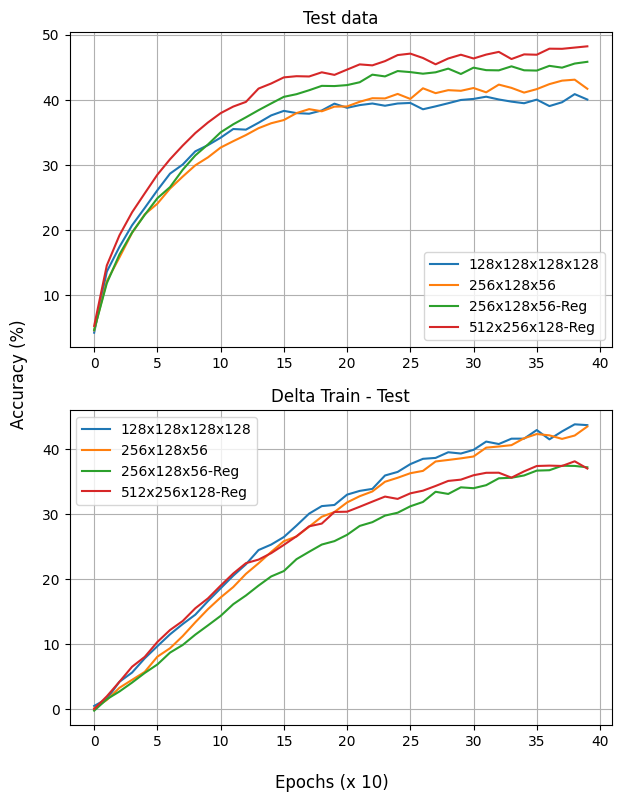

In [36]:
#read file and plot

df_accs = pd.read_csv('../results/accuracies_trained.txt', sep=r' |\t')
df_accs['sorting'] = scf.sorting_list(40, 4)
df_accs['deltas'] = df_accs['train_accuracy'] - df_accs['test_accuracy']
df_accs_train = df_accs.pivot(index = 'hidden_width', values = 'train_accuracy', columns = 'sorting')
df_accs_test = df_accs.pivot(index = 'hidden_width', values = 'test_accuracy', columns = 'sorting')
df_accs_deltas = df_accs.pivot(index = 'hidden_width', values = 'deltas', columns = 'sorting')
df_accs_train.T.plot(title='Training data', xlabel='Epochs (x 10)', ylabel='Accuracy (%)', grid = True)
plt.legend(title='')

#make the plot more suitable for the report
fig, ax = plt.subplots(2,1, figsize=(7,9))
df_accs_test.T.plot(title='Test data', xlabel = '',  grid = True, ax=ax[0])
ax[0].legend(title='')
df_accs_deltas.T.plot(title='Delta Train - Test', xlabel = '', grid = True, ax=ax[1])
ax[1].legend(title='')
fig.text(0.5, 0.04, 'Epochs (x 10)', ha='center', fontsize = 12)
fig.text(0.04, 0.5, 'Accuracy (%)', va='center', rotation='vertical', fontsize = 12)


### 1.5 Analysis

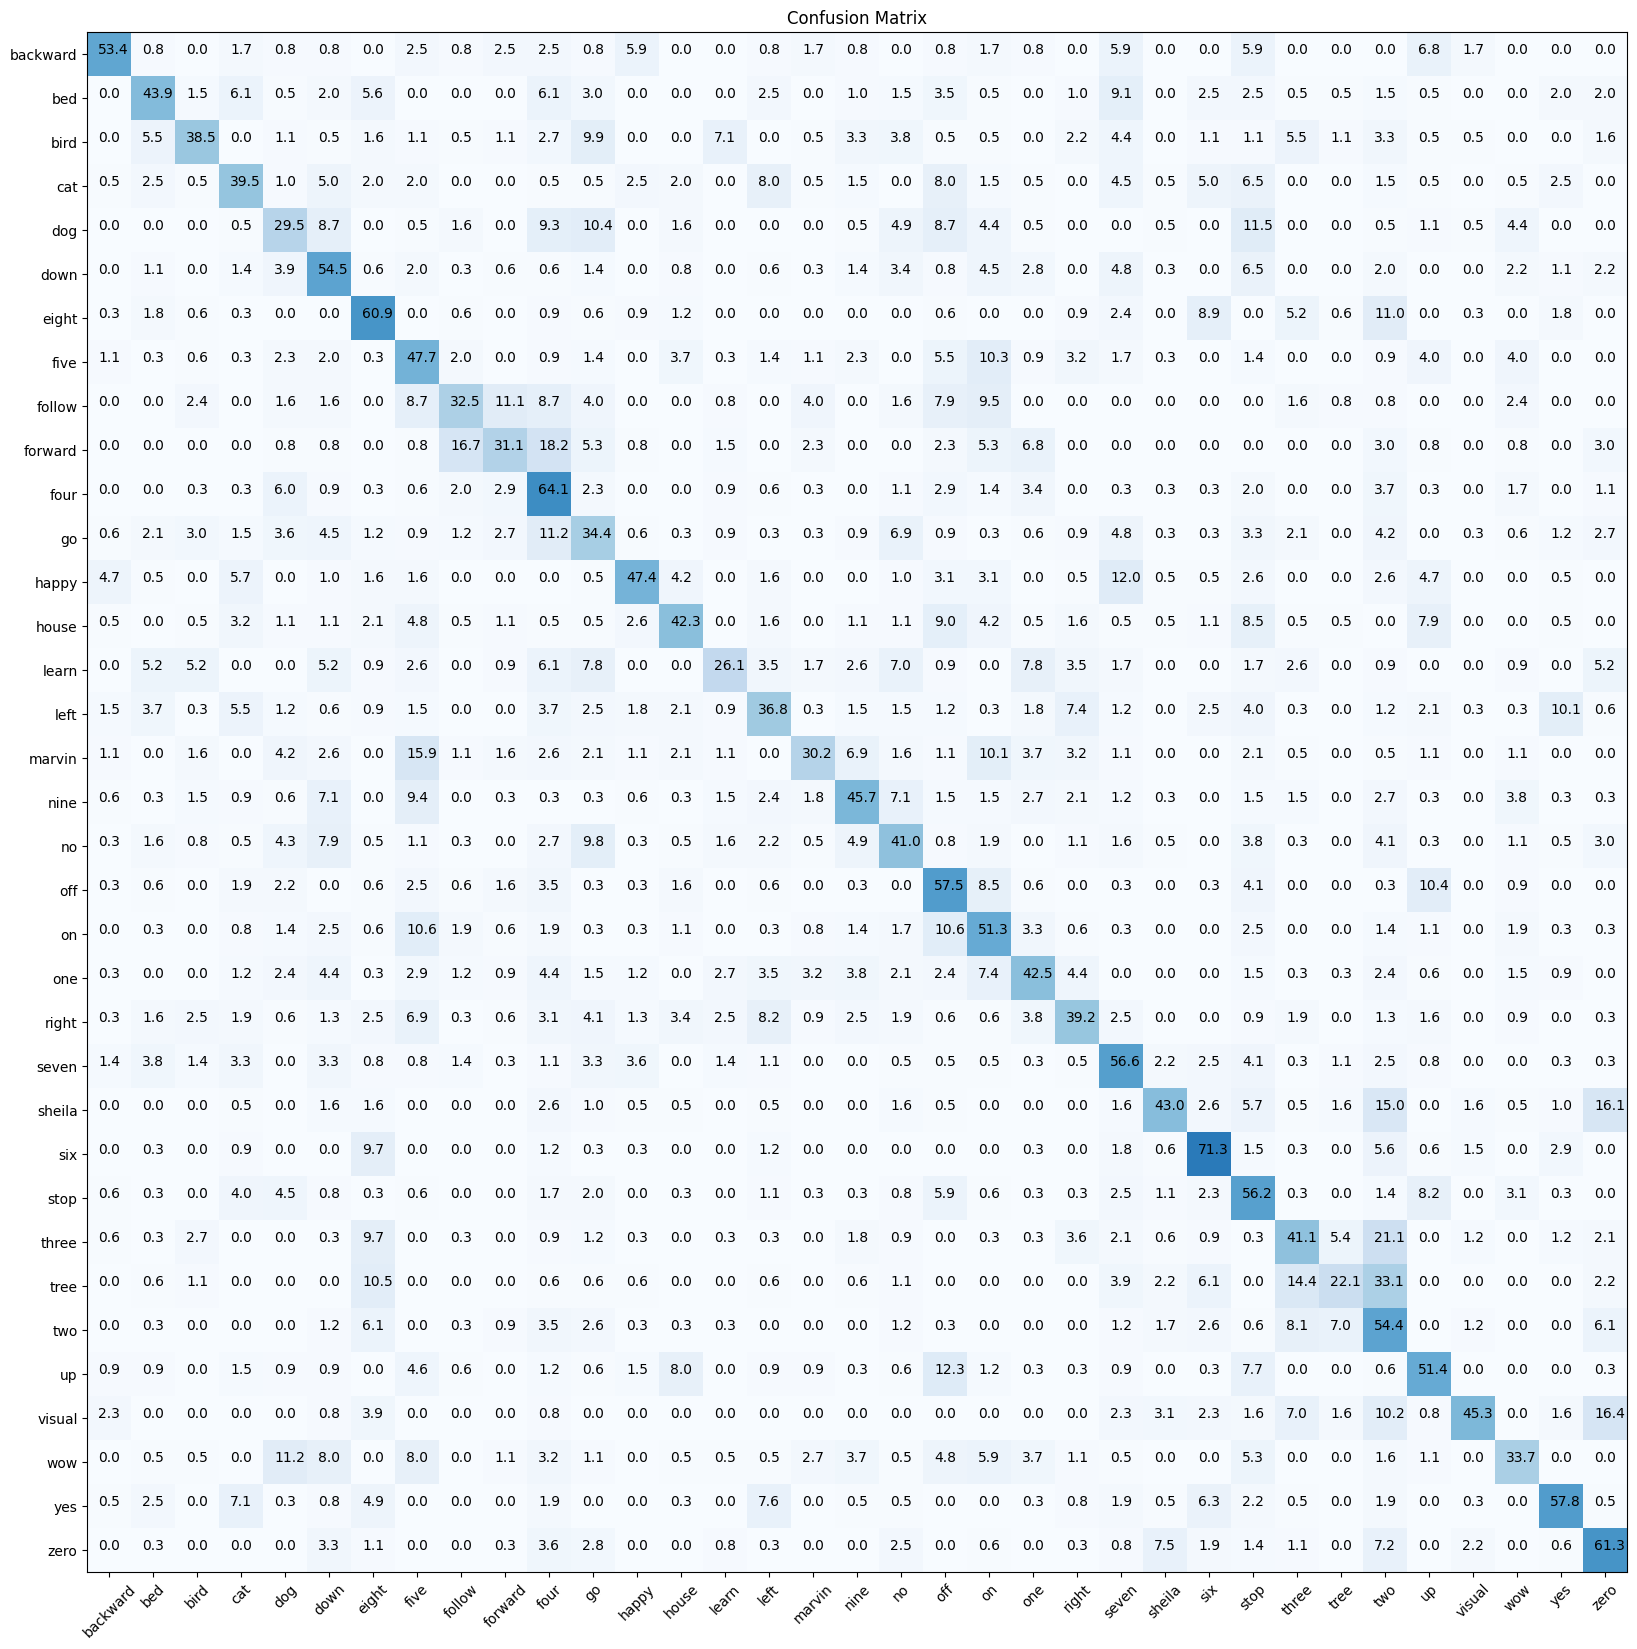

In [37]:
#LOAD THE MODEL
net = pvml.MLP.load('MLP_512x256x128_reg_trained.npz')
predictions, probs = net.inference(test_X_norm_MV)

#get and print confusion matrix
cm = scf.confusion_matrix(test_Y, predictions, classes, show = True)

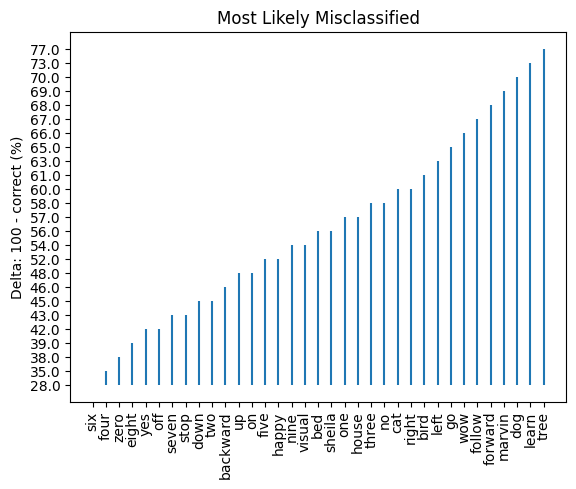

In [38]:
#Returns the n classes for which the delta between 100 and the percentage of correct classified is the largest
arr = scf.likely_misclassified(counters, cm, classes, 35, show = True)

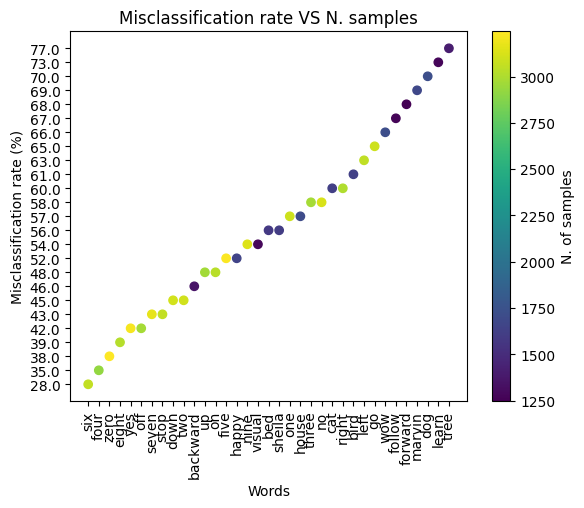

In [39]:
# create scatter plot to understand correlation between misclassification and occurrences
plt.scatter(arr[0,:], arr[1,:], c=arr[2,:].astype(int), cmap='viridis')
plt.xticks(arr[0,:], rotation = 90)
plt.title('Misclassification rate VS N. samples')
plt.xlabel('Words')
plt.ylabel('Misclassification rate (%)')
plt.colorbar(label='N. of samples')
plt.show()


the class 'backward' is frequently exchanged with 'up'
the class 'bed' is frequently exchanged with 'seven'
the class 'bird' is frequently exchanged with 'go'
the class 'cat' is frequently exchanged with 'left'
the class 'dog' is frequently exchanged with 'stop'
the class 'down' is frequently exchanged with 'stop'
the class 'eight' is frequently exchanged with 'two'
the class 'five' is frequently exchanged with 'on'
the class 'follow' is frequently exchanged with 'forward'
the class 'forward' is frequently exchanged with 'four'
the class 'four' is frequently exchanged with 'dog'
the class 'go' is frequently exchanged with 'four'
the class 'happy' is frequently exchanged with 'seven'
the class 'house' is frequently exchanged with 'off'
the class 'learn' is frequently exchanged with 'go'
the class 'left' is frequently exchanged with 'yes'
the class 'marvin' is frequently exchanged with 'five'
the class 'nine' is frequently exchanged with 'five'
the class 'no' is frequently exchanged with

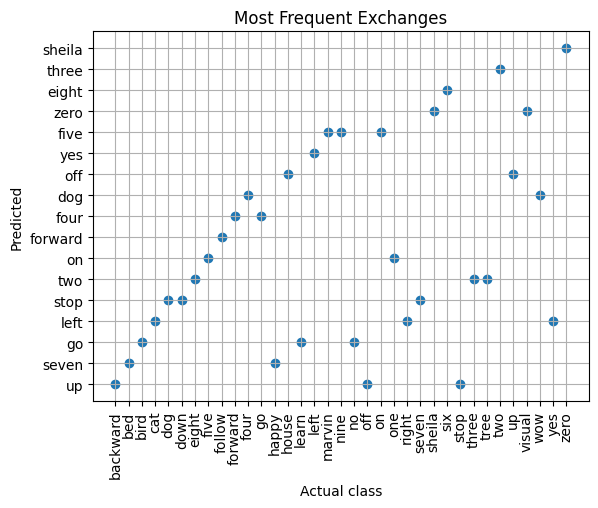

In [40]:
#print most frequet classes exchanges
wrong_labelled, wrong_valued = scf.wrong_classes(cm, classes)
for j in range(35):
    print(f"the class '{wrong_labelled[0,j]}' is frequently exchanged with '{wrong_labelled[1,j]}'")

plt.figure(2)
plt.scatter(wrong_labelled[0,:], wrong_labelled[1,:])
plt.grid(True)
plt.xticks(rotation=90)
plt.title('Most Frequent Exchanges')
plt.xlabel('Actual class')
plt.ylabel('Predicted')
plt.show(2)

[['three' 'forward' 'visual']
 ['two' 'four' 'zero']]
row index =  19
row index =  29
row index =  32
row index =  7
row index =  16
row index =  27


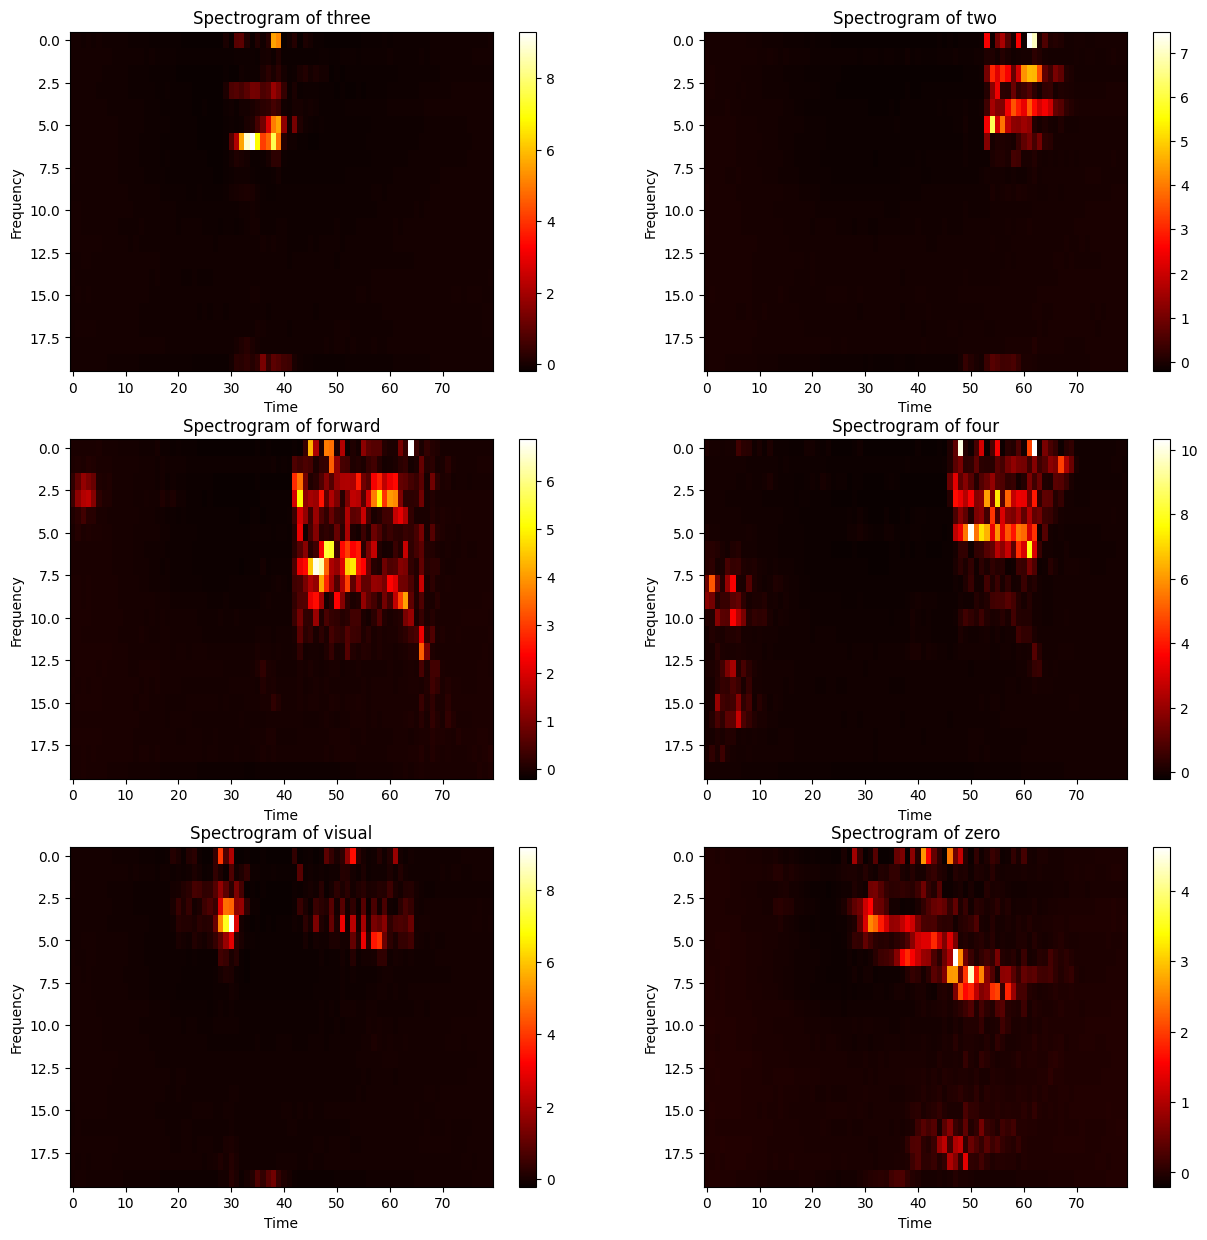

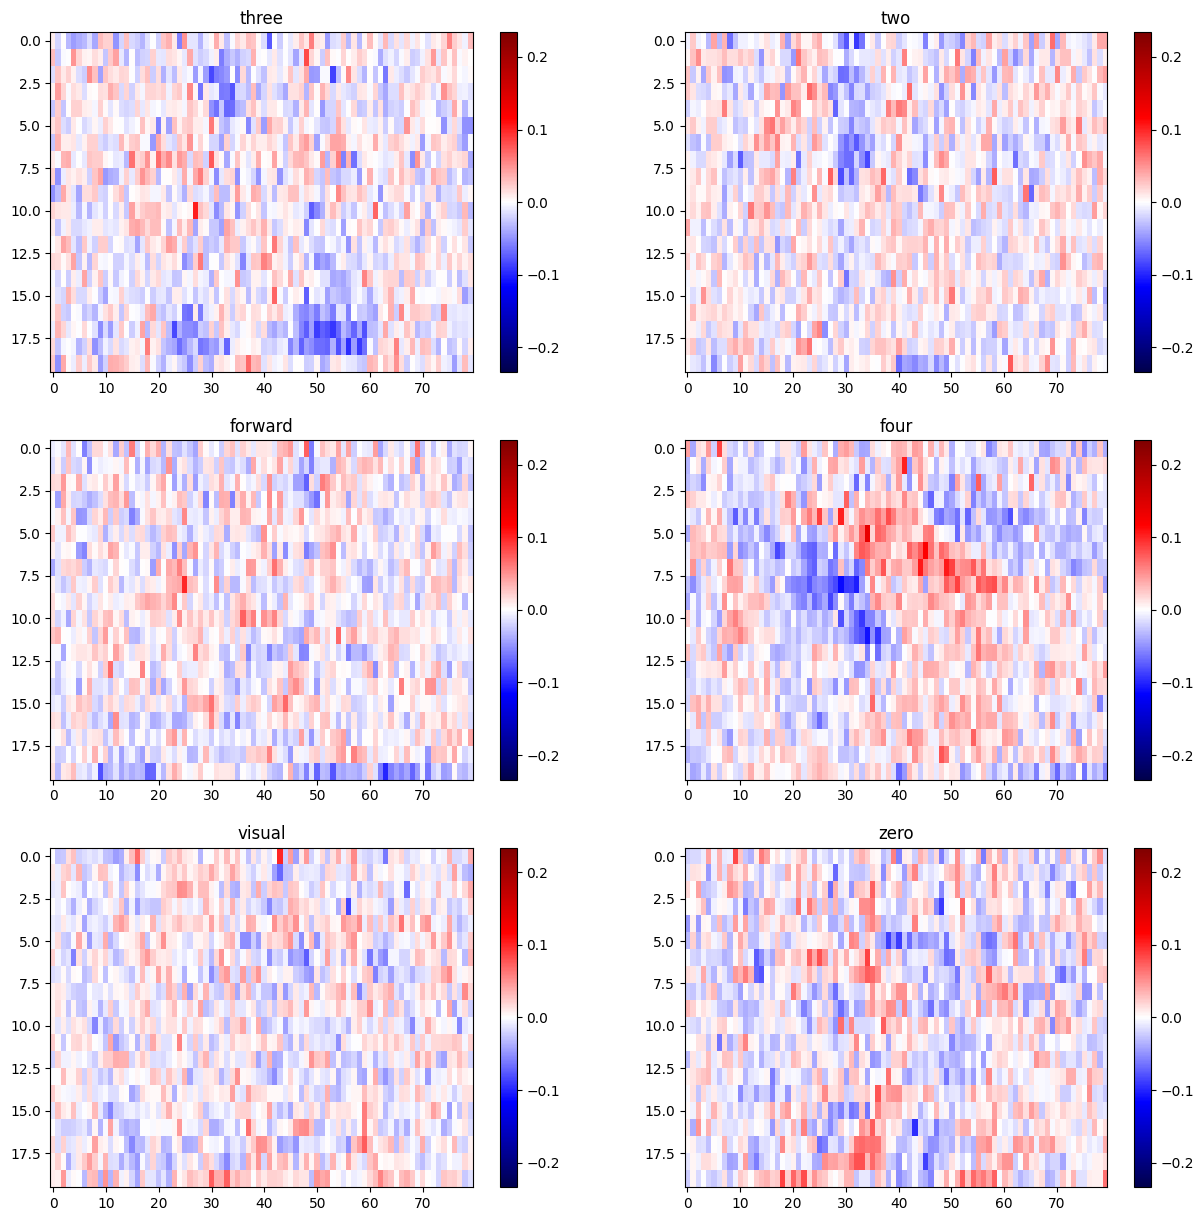

In [41]:
#Take the 3 words and the classes in which they are most frequently wrongly classified
from_position = 1
to_position_excluded = 4
indexes = np.argsort(wrong_valued[2,:])[::-1][from_position:to_position_excluded]
tmp_lab = wrong_labelled[:,indexes]
tmp_val = wrong_valued[:,indexes]
print(tmp_lab)

#Compare the 4 spectrograms of the 3 exchanges 
plt.figure(3, figsize=(15,15))
plt.subplot(3,2,1)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[0,0])
plt.subplot(3,2,2)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[1,0])
plt.subplot(3,2,3)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[0,1])
plt.subplot(3,2,4)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[1,1])
plt.subplot(3,2,5)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[0,2])
plt.subplot(3,2,6)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[1,2])

plt.show(3)

#Compare the 4 weights of the 3 exchanges
plt.figure(3, figsize=(15,15))
plt.subplot(3,2,1)
scf.show_weights_single(net, classes, int(tmp_val[0,0]))
plt.subplot(3,2,2)
scf.show_weights_single(net, classes, int(tmp_val[1,0]))
plt.subplot(3,2,3)
scf.show_weights_single(net, classes, int(tmp_val[0,1]))
plt.subplot(3,2,4)
scf.show_weights_single(net, classes, int(tmp_val[1,1]))
plt.subplot(3,2,5)
scf.show_weights_single(net, classes, int(tmp_val[0,2]))
plt.subplot(3,2,6)
scf.show_weights_single(net, classes, int(tmp_val[1,2]))
plt.show(3)

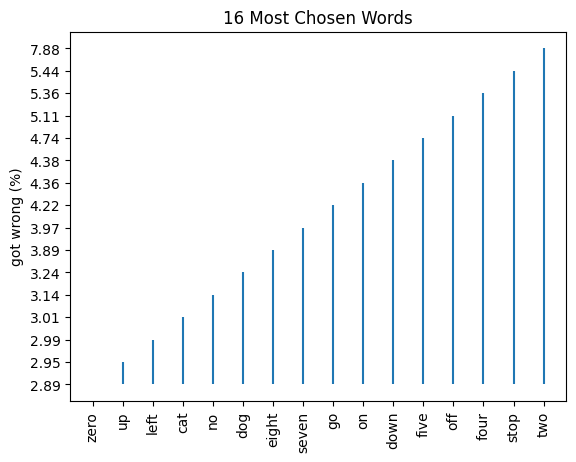

In [42]:
#Display confusion matrix without normalization
cm_NOnorm = scf.confusion_matrix(test_Y, predictions, classes, show = False, rnorm = False)

#Returns the words the model chosen as wrongly prediction most of times
n_misclass = scf.n_misclassified(cm_NOnorm, classes, to_show = 16)

### 2.1 Features Normalization

In [43]:
#define a template for training and testing using different normalization technics with the chosen batch size and architecture        

#DECOMMENT TO USE
'''

scf.compare_norm(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 'MV', store = True)
scf.compare_norm(train_X_norm_MM, train_Y, test_X_norm_MM, test_Y, 'MM', store = True)
scf.compare_norm(train_X_norm_MA, train_Y, test_X_norm_MA, test_Y, 'MA', store = True)
scf.compare_norm(train_X_norm_WN, train_Y, test_X_norm_WN, test_Y, 'WN', store = True)


'''


"\n\nscf.compare_norm(train_X_norm_MV, train_Y, test_X_norm_MV, test_Y, 'MV', store = True)\nscf.compare_norm(train_X_norm_MM, train_Y, test_X_norm_MM, test_Y, 'MM', store = True)\nscf.compare_norm(train_X_norm_MA, train_Y, test_X_norm_MA, test_Y, 'MA', store = True)\nscf.compare_norm(train_X_norm_WN, train_Y, test_X_norm_WN, test_Y, 'WN', store = True)\n\n\n"

/tmp/ipykernel_2569/1748696871.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_accs = pd.read_csv('../results/accuracies_norm.txt', sep=r' |\t')


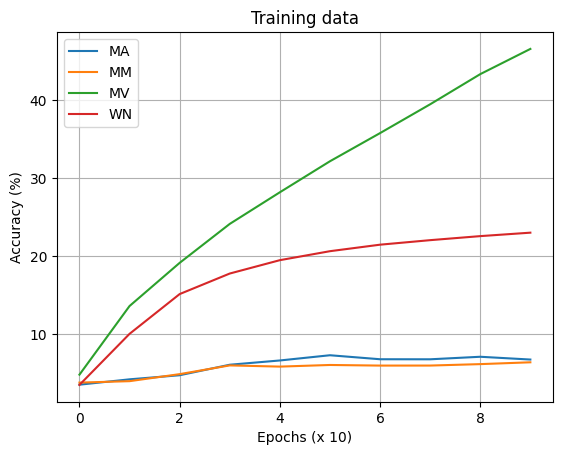

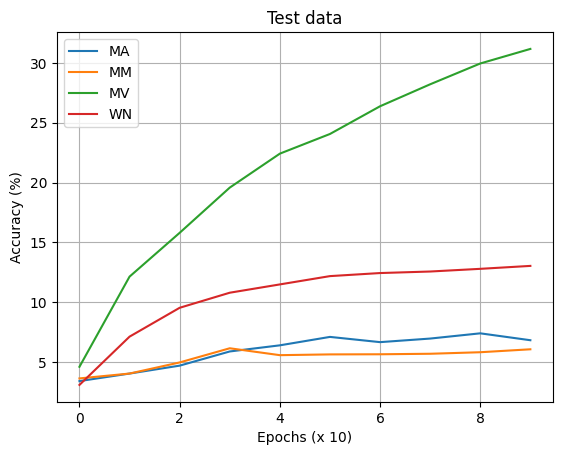

In [44]:
#read file and plot
df_accs = pd.read_csv('../results/accuracies_norm.txt', sep=r' |\t')
df_accs['sorting'] = scf.sorting_list(10,4)
df_accs_train = df_accs.pivot(index = 'norm_type', values = 'train_accuracy', columns = 'sorting')
df_accs_test = df_accs.pivot(index = 'norm_type', values = 'test_accuracy', columns = 'sorting')
df_accs_train.T.plot(title='Training data', xlabel='Epochs (x 10)', ylabel='Accuracy (%)', grid = True)
plt.legend(title='')
df_accs_test.T.plot(title='Test data', xlabel='Epochs (x 10)', ylabel='Accuracy (%)', grid = True)
plt.legend(title='')


### 2.2 Visualization

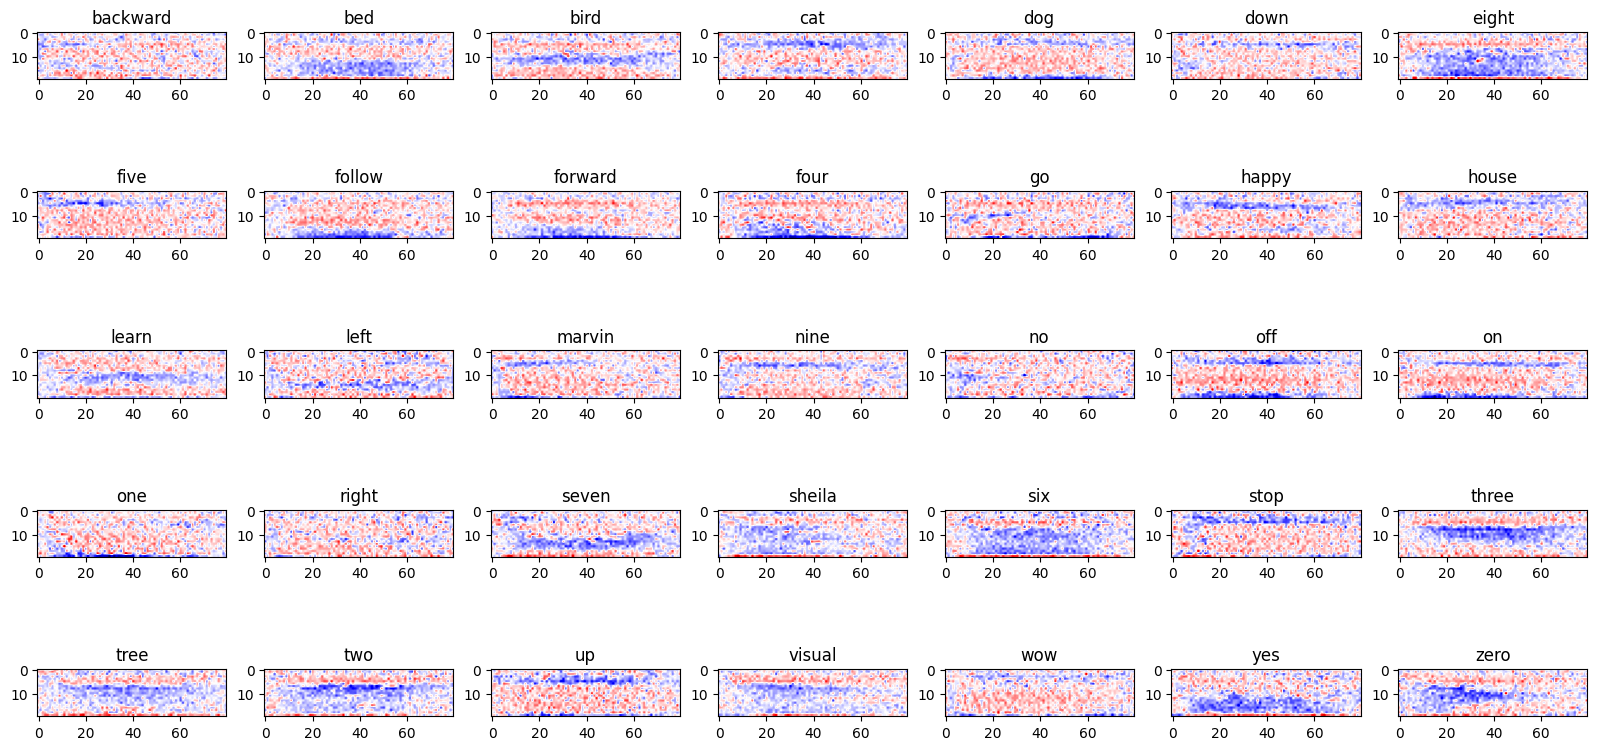

In [45]:
#show weights
net = pvml.MLP.load('MLP_1600x35_50it.npz')
scf.show_weights_multiple(net, classes)

row index =  29
row index =  7
row index =  27


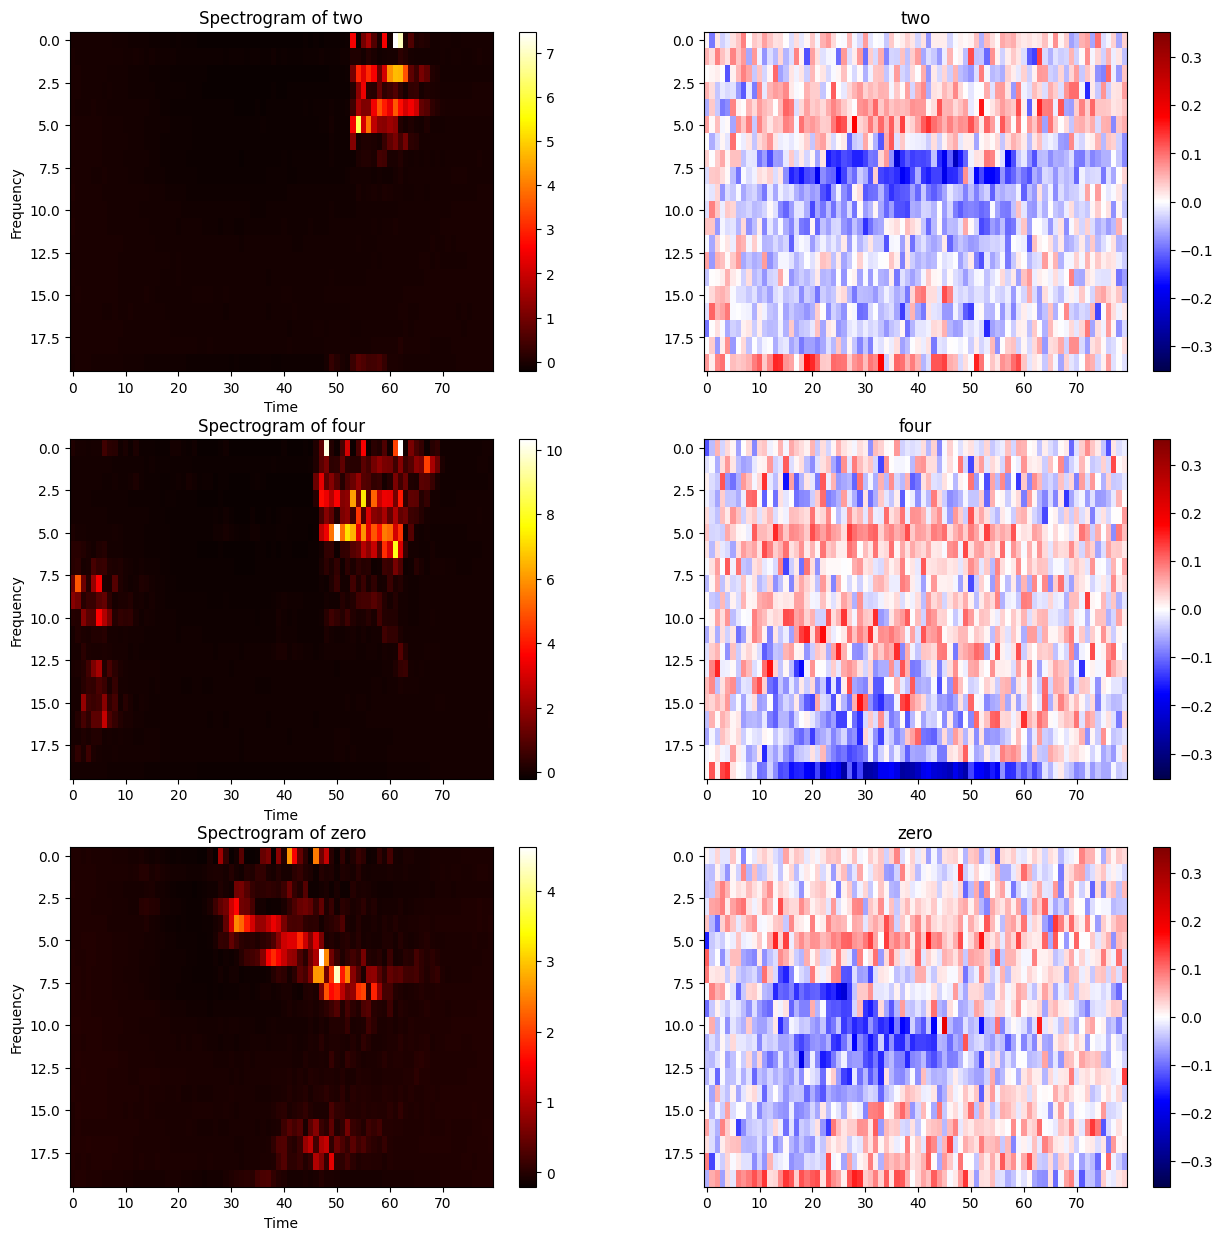

In [46]:
#compare weights and spectrograms
plt.figure(3, figsize=(15,15))
plt.subplot(3,2,1)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[1,0])
plt.subplot(3,2,3)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[1,1])
plt.subplot(3,2,5)
scf.show_spectrogram(train_X_norm_MV, train_Y, classes, tmp_lab[1,2])
plt.subplot(3,2,2)
scf.show_weights_single(net, classes, int(tmp_val[1,0]))
plt.subplot(3,2,4)
scf.show_weights_single(net, classes, int(tmp_val[1,1]))
plt.subplot(3,2,6)
scf.show_weights_single(net, classes, int(tmp_val[1,2]))
plt.show(3)